### Hotel Booking Analysis

 - Objective: 
Evaluate candidates' ability to analyze, interpret, and visualize data relevant to the hospitality industry. The task will focus on customer satisfaction and operational efficiency using a publicly available dataset.

#### 1. Data Understanding and Preprocessing:
- Load the dataset and provide a summary of its structure (number of rows, columns, data types, and missing values).
- Perform data cleaning:
     - Handle missing values appropriately.
     - Convert data types if necessary.
     - Create any new features you think might be useful.



- hotel: Type of hotel (e.g., "Resort Hotel" or "City Hotel"). Useful for comparing booking patterns or cancellations between different hotel types.

- is_canceled: Indicator if a booking was canceled (1 = canceled, 0 = not canceled). This is key for analyzing cancellation trends and developing predictive models to forecast cancellations.

- lead_time: Days between booking and arrival. This feature helps understand booking behavior, identify last-minute bookings, and potentially detect early signs of cancellation.

- arrival_date_year: Year of arrival. Useful for understanding trends over time, particularly for long-term booking data.

- arrival_date_month: Month of arrival. This feature helps in analyzing seasonal trends and peak booking periods.

- arrival_date_week_number: Week number of arrival. Useful for identifying weekly patterns, particularly for short-term promotional analysis.

- arrival_date_day_of_month: Day of the month for arrival. Provides insights into mid-month or end-of-month booking trends.

- stays_in_weekend_nights: Number of weekend nights the guest stayed. Can be used to understand weekend vs. weekday booking preferences.

- stays_in_week_nights: Number of weekday nights the guest stayed. This feature complements weekend stay data, helping hotels identify common booking patterns.

- adults: Number of adults in the booking. Helps segment bookings based on group size, which may correlate with certain booking behaviors.

- children: Number of children in the booking. Useful for segmenting family travelers.

- babies: Number of babies in the booking. Similar to the "children" feature, but specific to infant travelers.

- meal: Type of meal plan included in the booking. Allows analysis of the popularity of meal plans, which can impact revenue and customer satisfaction.

- country: Country of origin of the guest. Useful for geographical segmentation and identifying trends among international vs. domestic travelers.

- market_segment: Segment through which the booking was made (e.g., online, corporate). Important for channel analysis to see which segments bring the most bookings or cancellations.

- distribution_channel: The channel through which the booking was distributed (e.g., direct, corporate). This allows for distribution strategy analysis, helping hotels optimize channels.

- is_repeated_guest: Indicator if the guest is a repeat customer (1 = yes, 0 = no). Useful for analyzing loyalty and retention rates.

- previous_cancellations: Number of previous bookings by the customer that were canceled. This could serve as a predictor of future cancellations.

- previous_bookings_not_canceled: Number of previous bookings by the customer that were not canceled. Helps assess customer loyalty and potential likelihood of retention.

- reserved_room_type: Room type reserved by the guest. Useful for analyzing demand for specific room types.

- assigned_room_type: Room type actually assigned to the guest. Can be used to understand upgrade or room change patterns.

- booking_changes: Number of changes made to the booking. Indicates booking stability and might help identify indecisive or uncertain bookings.

- deposit_type: Type of deposit made (e.g., refundable, non-refundable). Helps understand the impact of deposit policies on cancellations.

- agent: ID of the booking agent, if applicable. Useful for analyzing performance of different agents.

- company: ID of the company booking the hotel, if applicable. This helps track corporate bookings.

- days_in_waiting_list: Number of days the booking was on the waiting list. Useful for demand analysis and understanding booking flow.

- customer_type: Type of customer (e.g., transient, group). Important for segmentation and targeting specific customer types.

- adr: Average Daily Rate, indicating the average revenue per room. This is key for revenue analysis and profitability.

- required_car_parking_spaces: Number of parking spaces requested. Useful for operational planning.

- total_of_special_requests: Number of special requests made by the guest. Provides insight into customer preferences and needs.

- reservation_status: Final status of the booking (e.g., checked out, canceled). Useful for tracking booking outcomes.

- reservation_status_date: Date of the last status update. This helps in tracking when changes were made to the booking.

In [97]:
## Load the dependancies
import warnings
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import f_oneway
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind


In [98]:
## load the dataset
dataset = pd.read_csv('.\data\hotel_bookings.csv')
dataset.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [99]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [100]:
dataset.shape

(119390, 32)

In [101]:
dataset.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [102]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#### Handling the missing values

In [103]:
## find the percentage of null values
(dataset.isnull().sum()[dataset.isnull().sum() > 0]/dataset.shape[0])*100

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

<Axes: xlabel='agent', ylabel='Density'>

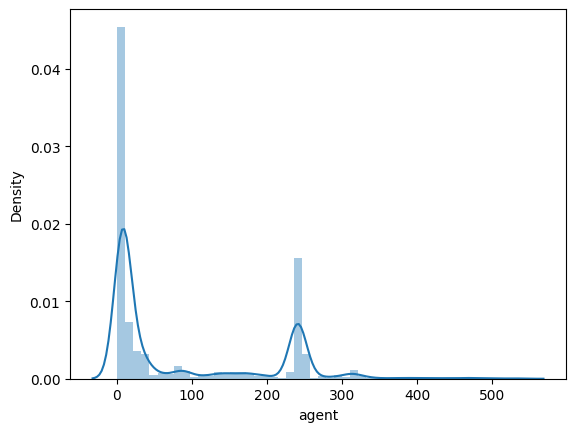

In [104]:
sns.distplot(dataset['agent'])  ##check the nature of data 

In [105]:
#handling missing values
dataset.drop(columns=['company'],inplace=True)  ##drop becouse have 94% null values
dataset['agent'].fillna(dataset['agent'].median(),inplace=True) ## according to skewness of data fill the na with median
dataset['country'].fillna(dataset['country'].mode()[0],inplace=True) # replace null values of categorical column to mode
dataset['children'].fillna(dataset['children'].mode()[0],inplace=True)     


In [106]:
dataset.isnull().sum().sum()  #their is no null values

np.int64(0)

#### Convert data types if necessary. 

In [107]:
dataset['children'] = dataset['children'].astype(int) #convert no. of children into integer datatype
dataset['reservation_status_date'] = pd.to_datetime(dataset['reservation_status_date']) # convert it into date time column            

#### Create any new features

In [108]:
# create the copy for adding the new features
data = dataset.copy()

In [109]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']  # total night to stay
data['total_guests'] = data['adults'] + data['children'] + data['babies']    # total count of people
data['is_family_booking'] = ((data['children'] > 0) | (data['babies'] > 0)).astype(int) #  is fiamily

data['arrival_date'] = data['arrival_date_year'].astype(str) + '-' + \
                         data['arrival_date_month'] + '-' + \
                         data['arrival_date_day_of_month'].astype(str) 
data['arrival_date'] = pd.to_datetime(data['arrival_date']) # combe arrival date into three columns date_time format

data['lead_time_group'] = pd.cut(data['lead_time'], bins=[0, 7, 30, 90, 365])
data['adr_group'] = pd.cut(data['adr'], bins=[0, 50, 100, 200, 500])



### 2. Exploratory Data Analysis (EDA):
- Provide a detailed EDA including visualizations. Focus on understanding booking trends, customer demographics, and cancellation patterns.
Use visualizations to highlight key insights, such as:
   - Seasonality in bookings.
   - Distribution of stays across different hotel types.
   - Average daily rate (ADR) trends.
   - Cancellation rates and factors affecting cancellations.

In [110]:
# find the distrinutions of datasets
sns.pairplot(data)

In [111]:
# find the summary of the dataset
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_nights,total_guests,is_family_booking,arrival_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104,3.427900,1.968239,0.078164,2016-08-28 16:39:45.727447808
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,0.000000,0.000000,0.000000,2015-07-01 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00,2.000000,2.000000,0.000000,2016-03-13 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00,3.000000,2.000000,0.000000,2016-09-06 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00,4.000000,2.000000,0.000000,2017-03-18 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,69.000000,55.000000,1.000000,2017-08-31 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,17.594721,50.535790,0.245291,0.792798,NaN,2.557439,0.722394,0.268431,NaN


#### Seasonality in bookings

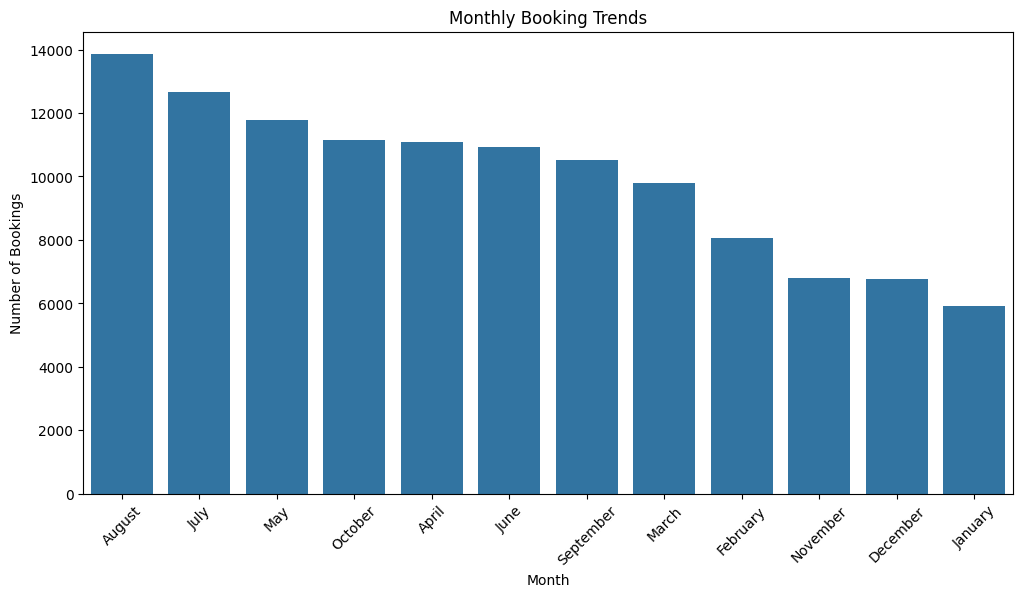

In [112]:
# check the which month have maximum booking
monthly_bookings = data['arrival_date_month'].value_counts() #.sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values)
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In July and August, most people tend to book hotels, as it's a popular time for travel. In contrast, January and November usually have fewer bookings. So here clear show that the hotel booking is high in rainy season and low in winter season.

#### Distribution of stays across different hotel types.

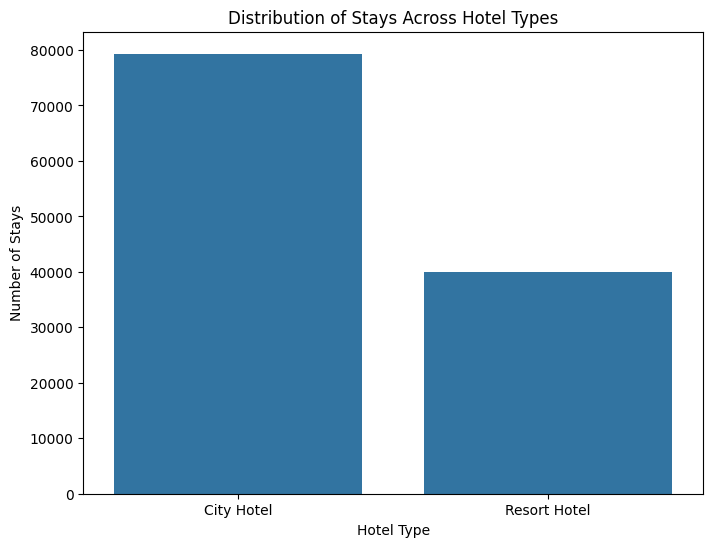

In [113]:
#check which hotel type pleople are visit
hotel_stays = data['hotel'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_stays.index, y=hotel_stays.values)
plt.title('Distribution of Stays Across Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Stays')
plt.show()

The mosly people are visit in city hotel as compare to the resort hotel

#### Data distribution city wise(top 10)

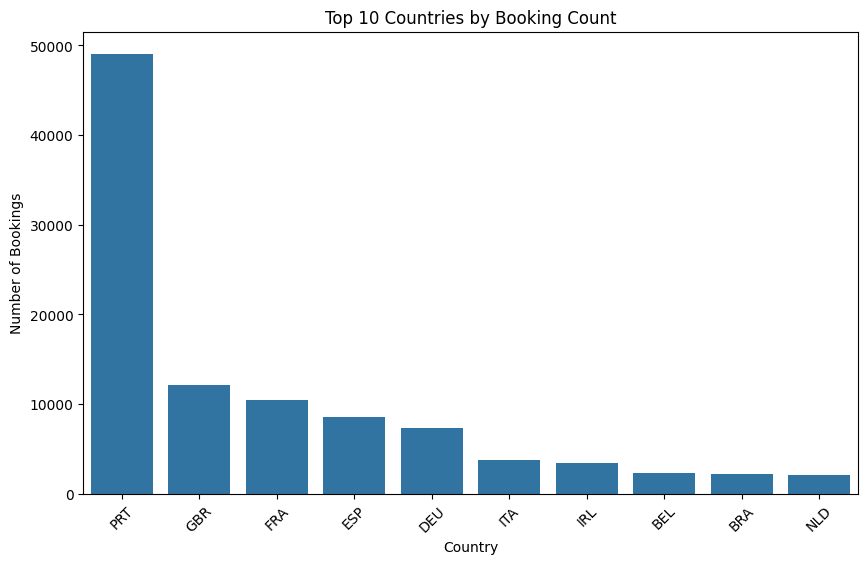

In [114]:
data_distribution = data['country'].value_counts().nlargest(10)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=data_distribution.index, y=data_distribution.values)
plt.title('Top 10 Countries by Booking Count')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

### Average daily rate (ADR) trends.

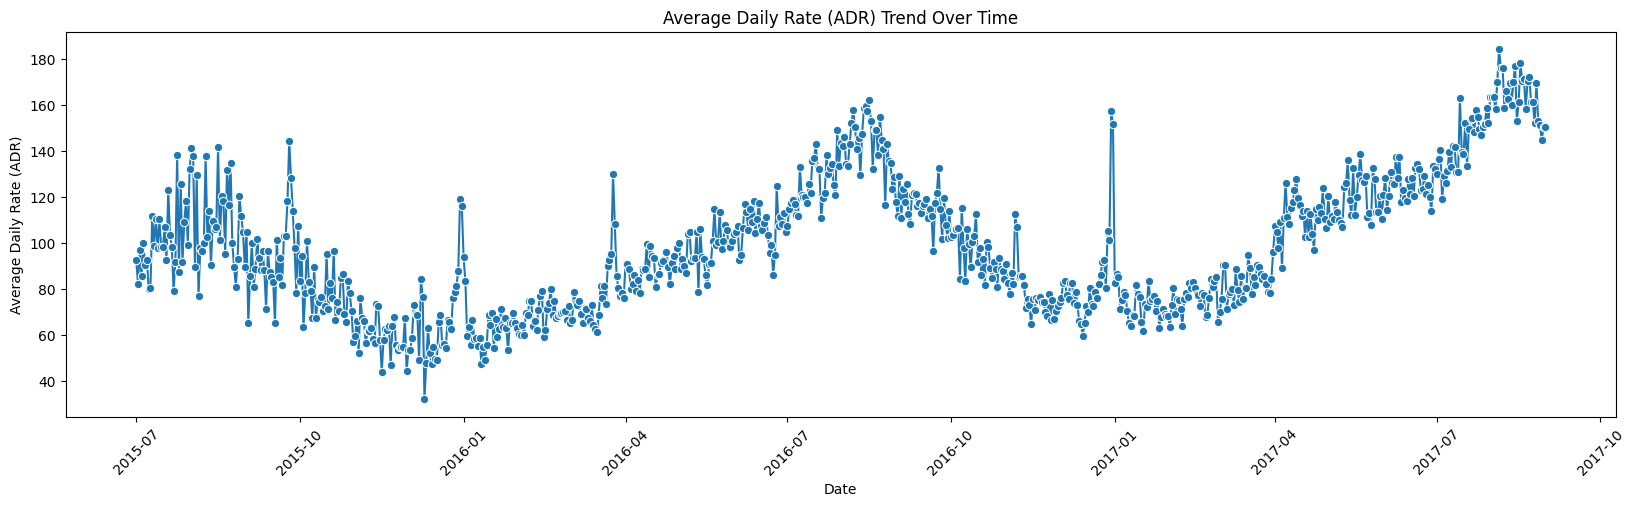

In [115]:

# find the trend of the arrival_date and ADR in month,year and day wise

data1=data.copy()

# Set the datetime column as the index
data1.set_index('arrival_date', inplace=True)

# Resample the ADR data to monthly average (use 'D' for daily, 'W' for weekly, 'M' for monthly)
monthly_adr = data1['adr'].resample('D').mean()

# Plot the ADR trend over time
plt.figure(figsize=(20, 5))
sns.lineplot(x=monthly_adr.index, y=monthly_adr.values, marker='o')
plt.title('Average Daily Rate (ADR) Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

The above trend show the seasonality with upword trend.

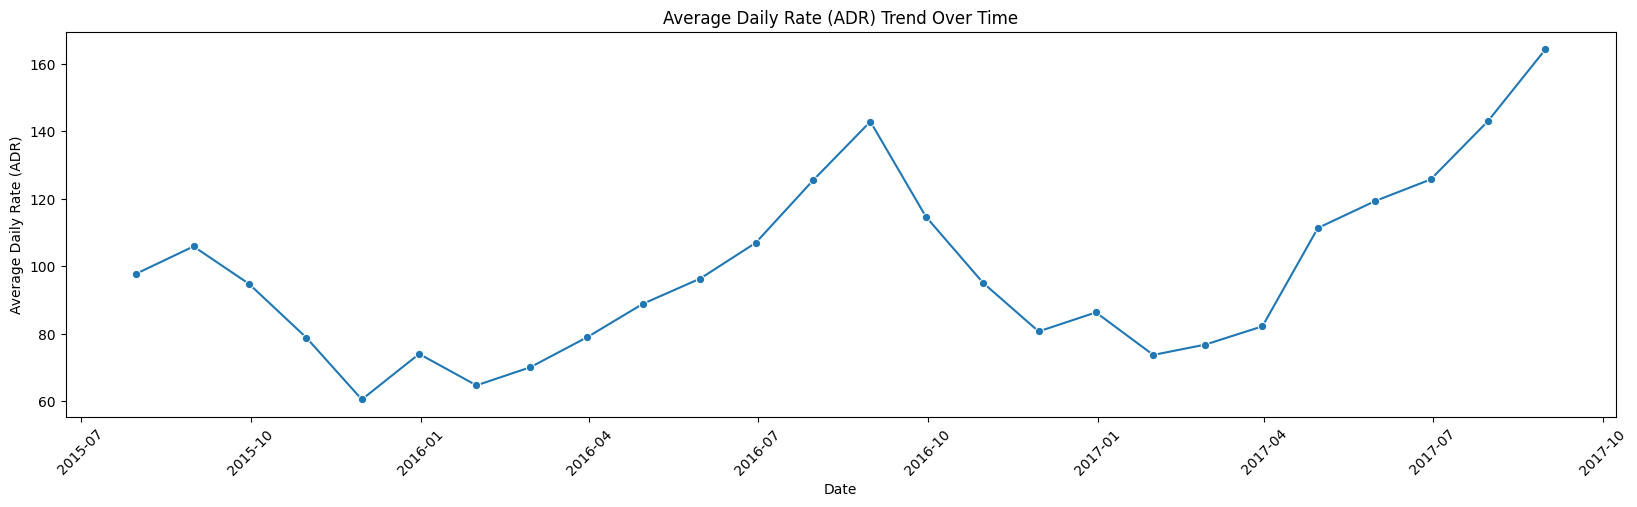

In [116]:
# find the trend of the arrival_date and ADR month and year wise

data1=data.copy()

# Set the datetime column as the index
data1.set_index('arrival_date', inplace=True)

# Resample the ADR data to monthly average (use 'D' for daily, 'W' for weekly, 'M' for monthly)
monthly_adr = data1['adr'].resample('M').mean()

# Plot the ADR trend over time
plt.figure(figsize=(20, 5))
sns.lineplot(x=monthly_adr.index, y=monthly_adr.values, marker='o')
plt.title('Average Daily Rate (ADR) Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

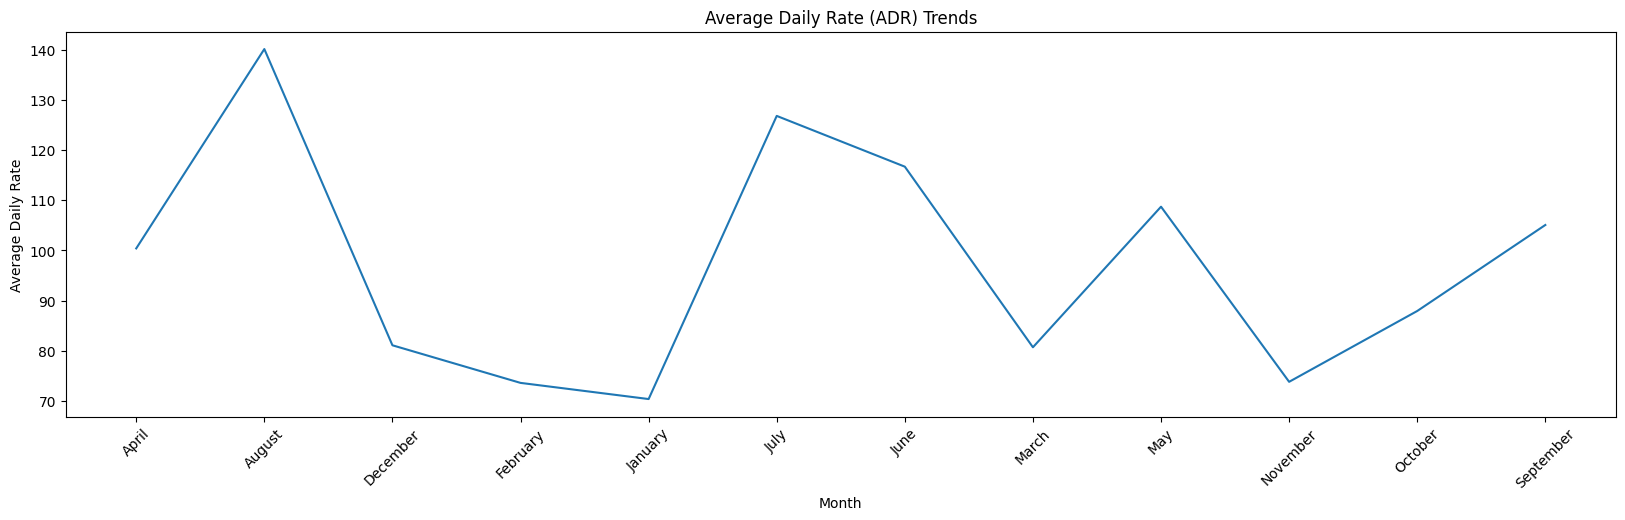

In [117]:
# Month wise ADR
monthly_adr = data.groupby('arrival_date_month')['adr'].mean()
plt.figure(figsize=(20, 5))
sns.lineplot(x=monthly_adr.index, y=monthly_adr.values)
plt.title('Average Daily Rate (ADR) Trends')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.show()

### Cancellation rates and factors affecting cancellations.

1. Cancellation Rates : Calculate the overall cancellation rate and visualize it.

Overall Cancellation Rate: 37.04%


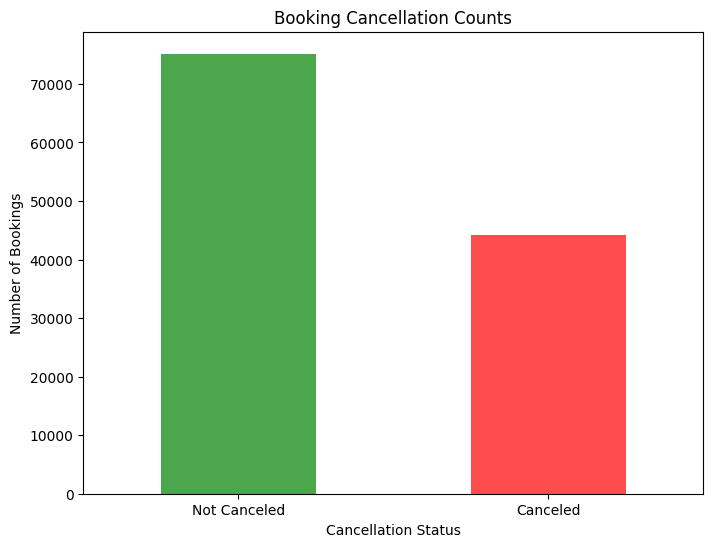

In [118]:
# Calculate overall cancellation rate
cancellation_rate = data['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancellation_rate:.2f}%")

# Plot the cancellation rate
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
data['is_canceled'].value_counts().plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Booking Cancellation Counts')
plt.xlabel('Cancellation Status')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'], rotation=0)
plt.ylabel('Number of Bookings')
plt.show()

#### 2. Factor affecting cancelation rate
- 2.1: Cancellation by Year and Month : Analyze cancellation rates by year and month to identify trends.

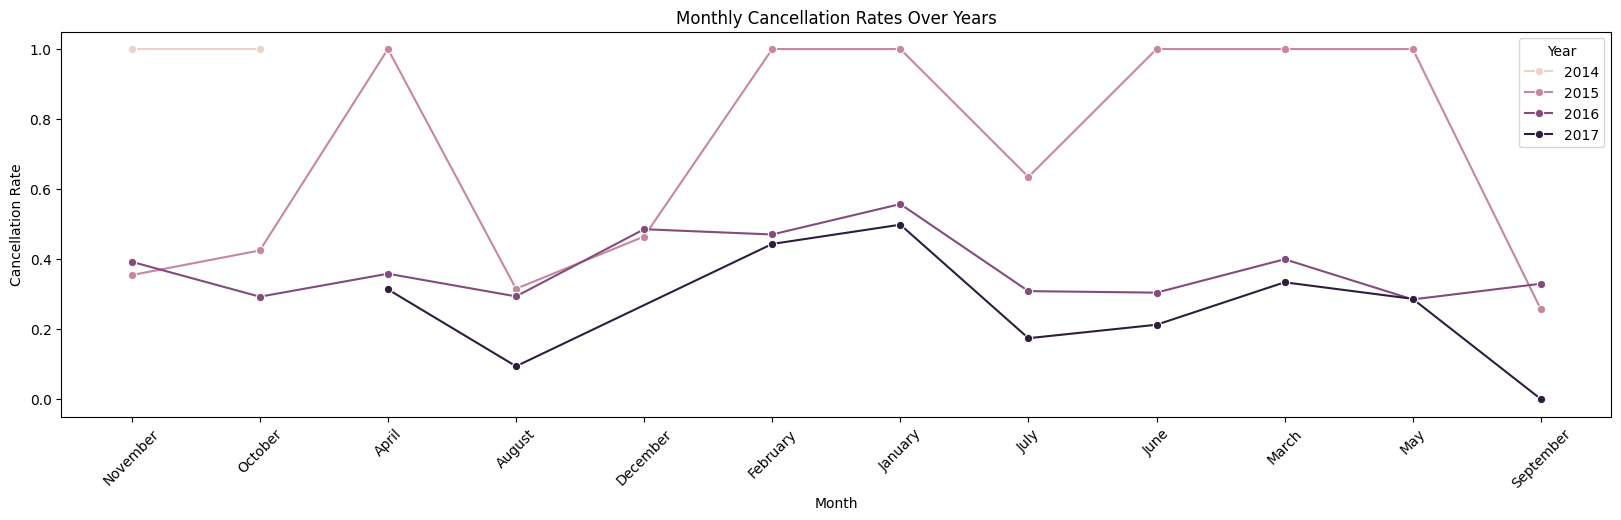

In [119]:
# Extract year and month from reservation_status_date
data['year'] = data['reservation_status_date'].dt.year
data['month'] = data['reservation_status_date'].dt.month_name()

# Group by year and month
monthly_cancellation = data.groupby(['year', 'month'])['is_canceled'].mean().reset_index()

# Plot the trend of cancellation rates over months
plt.figure(figsize=(20, 5))
import seaborn as sns

sns.lineplot(data=monthly_cancellation, x='month', y='is_canceled', hue='year', marker='o')
plt.title('Monthly Cancellation Rates Over Years')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

- 2.2: Factors Affecting Cancellations : Examine different factors such as lead time, customer demographics, and booking sources.

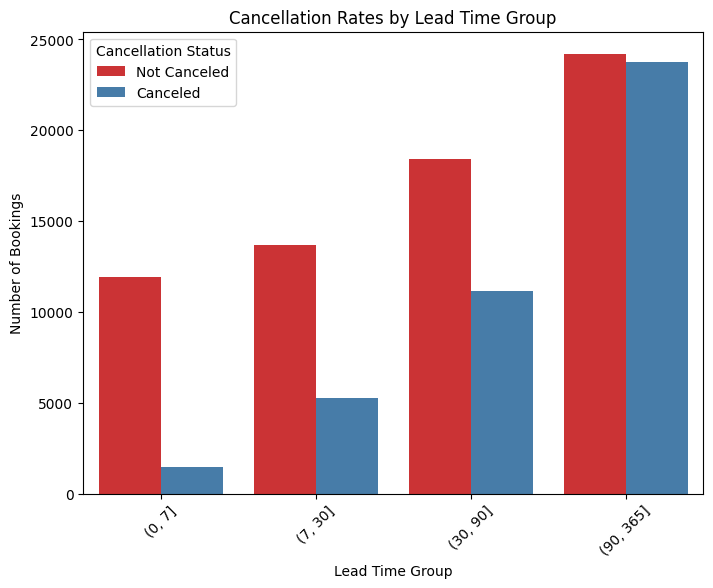

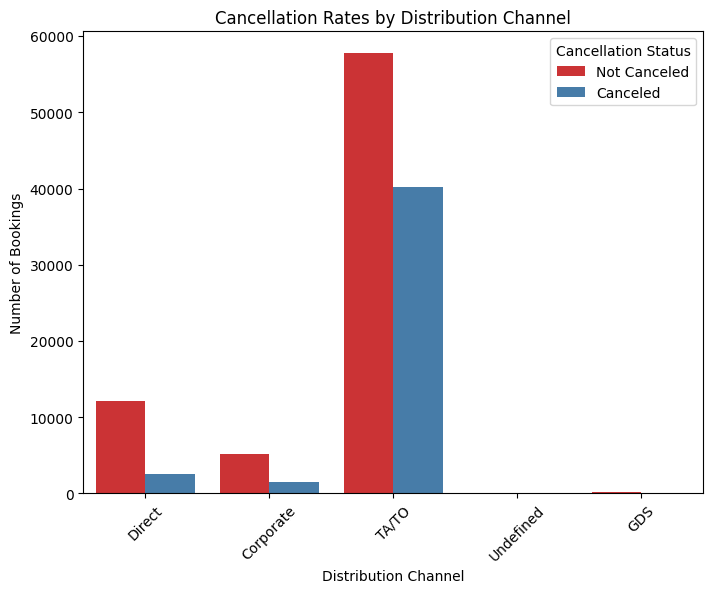

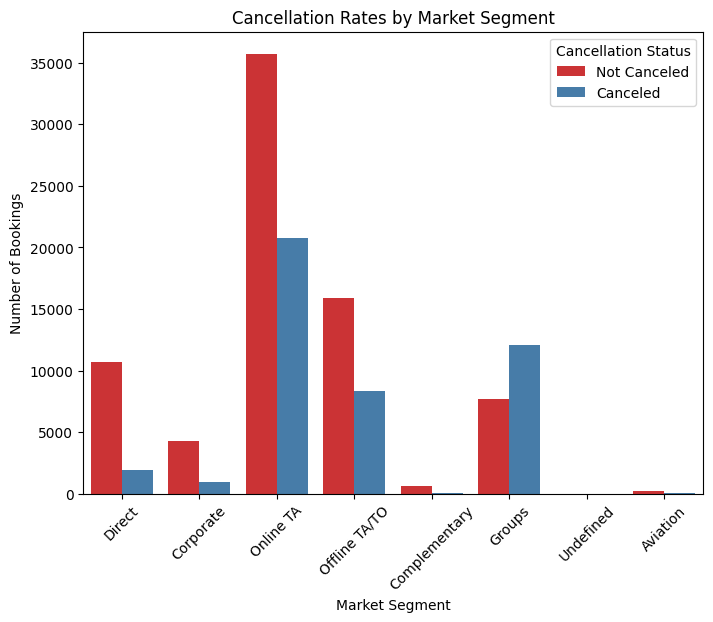

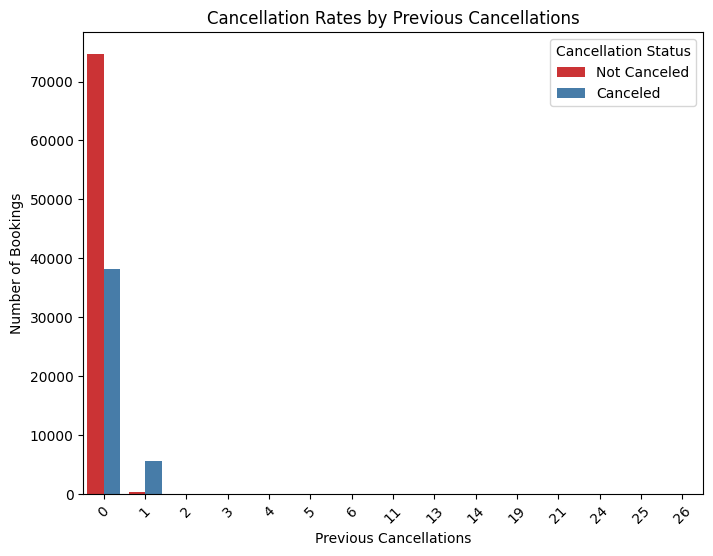

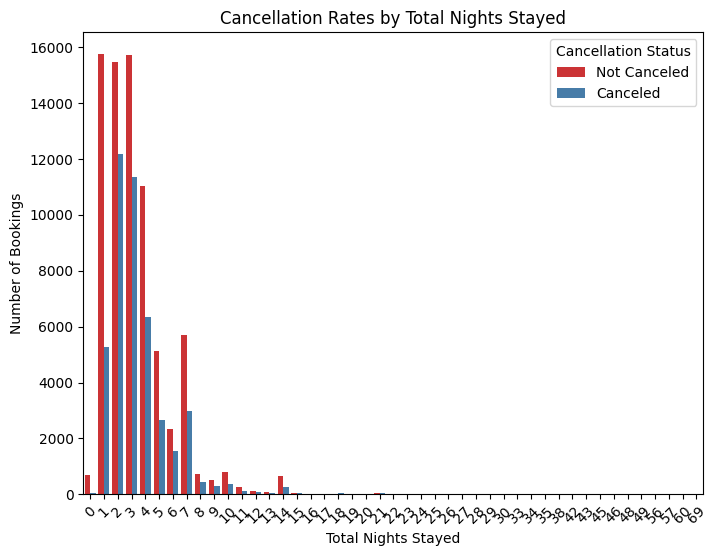

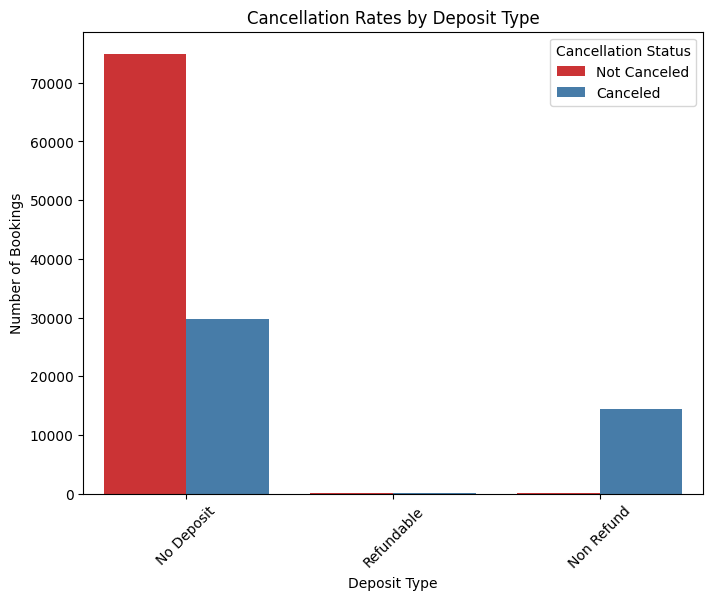

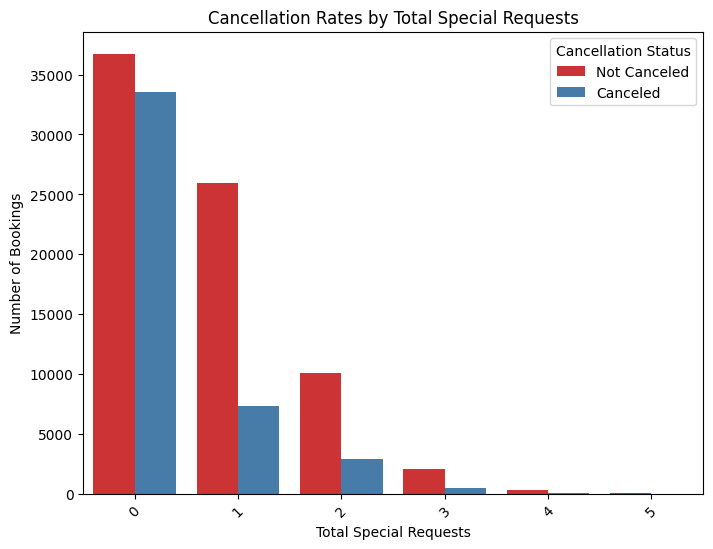

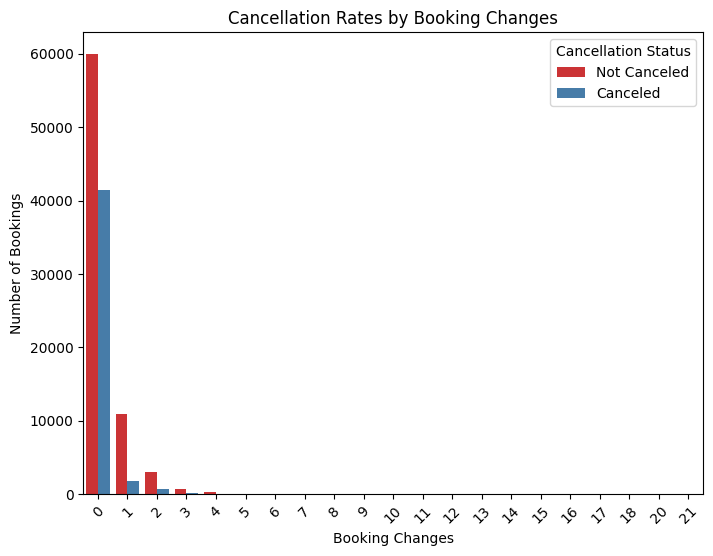

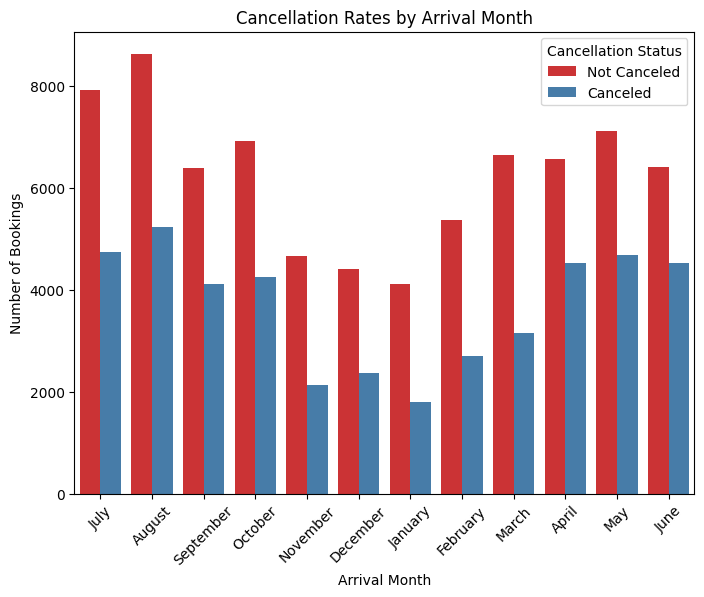

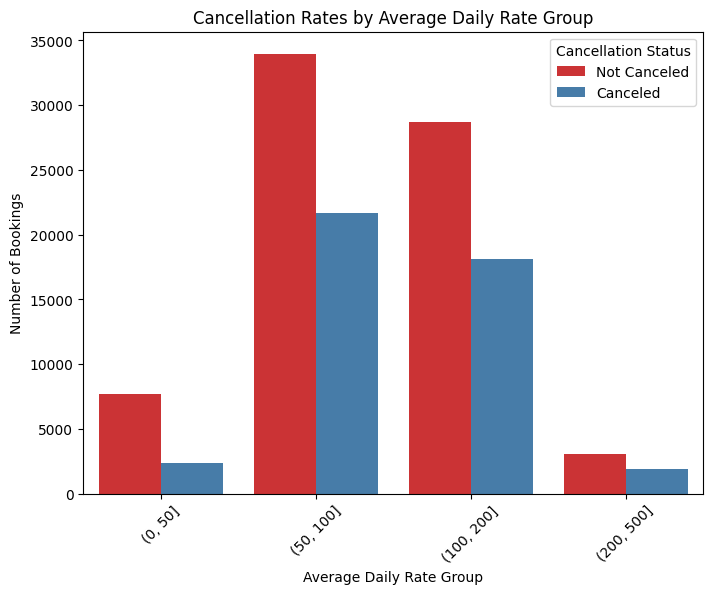

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway

# Assuming 'data' is your DataFrame containing the hotel booking data.

# List of features to analyze
features = {
    'lead_time_group': 'Lead Time Group',
    'distribution_channel': 'Distribution Channel',
    'market_segment': 'Market Segment',
    'previous_cancellations': 'Previous Cancellations',
    'total_nights': 'Total Nights Stayed',
    'deposit_type': 'Deposit Type',
    'total_of_special_requests': 'Total Special Requests',
    'booking_changes': 'Booking Changes',
    'arrival_date_month': 'Arrival Month',
    'adr_group': 'Average Daily Rate Group'
}


# Function to plot cancellation rates by feature
def plot_cancellation_rate(feature, feature_name):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, hue='is_canceled', palette='Set1')
    plt.title(f'Cancellation Rates by {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Number of Bookings')
    plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
    plt.xticks(rotation=45)
    plt.show()

# Loop through each feature to plot
for feature, feature_name in features.items():
    plot_cancellation_rate(feature, feature_name)



In [121]:
features1 = {
    'distribution_channel': 'Distribution Channel',
    'market_segment': 'Market Segment',
    'previous_cancellations': 'Previous Cancellations',
    'total_nights': 'Total Nights Stayed',
    'deposit_type': 'Deposit Type',
    'total_of_special_requests': 'Total Special Requests',
    'booking_changes': 'Booking Changes',
    'arrival_date_month': 'Arrival Month',
}

# Hypothesis Testing for each feature
for feature, feature_name in features1.items():
    print(f"Hypothesis Testing for {feature_name}:")
    # Chi-Square Test for binary/categorical features
    contingency = pd.crosstab(data['is_canceled'], data[feature])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    print(f"Chi-Square Test: Chi2 = {chi2:.2f}, p-value = {p_val:.4f}")
    
    if p_val < 0.05:
        print(f"Conclusion: Significant association between cancellation rates and {feature_name}.")
    else:
        print(f"Conclusion: No significant association between cancellation rates and {feature_name}.")

print('--------------------------------------')


Hypothesis Testing for Distribution Channel:
Chi-Square Test: Chi2 = 3745.79, p-value = 0.0000
Conclusion: Significant association between cancellation rates and Distribution Channel.
Hypothesis Testing for Market Segment:
Chi-Square Test: Chi2 = 8497.22, p-value = 0.0000
Conclusion: Significant association between cancellation rates and Market Segment.
Hypothesis Testing for Previous Cancellations:
Chi-Square Test: Chi2 = 9274.83, p-value = 0.0000
Conclusion: Significant association between cancellation rates and Previous Cancellations.
Hypothesis Testing for Total Nights Stayed:
Chi-Square Test: Chi2 = 2737.38, p-value = 0.0000
Conclusion: Significant association between cancellation rates and Total Nights Stayed.
Hypothesis Testing for Deposit Type:
Chi-Square Test: Chi2 = 27677.33, p-value = 0.0000
Conclusion: Significant association between cancellation rates and Deposit Type.
Hypothesis Testing for Total Special Requests:
Chi-Square Test: Chi2 = 8406.50, p-value = 0.0000
Conclusi

4. Analysis of Demographics : Examine how demographics like the number of adults, children, and babies affect cancellation.

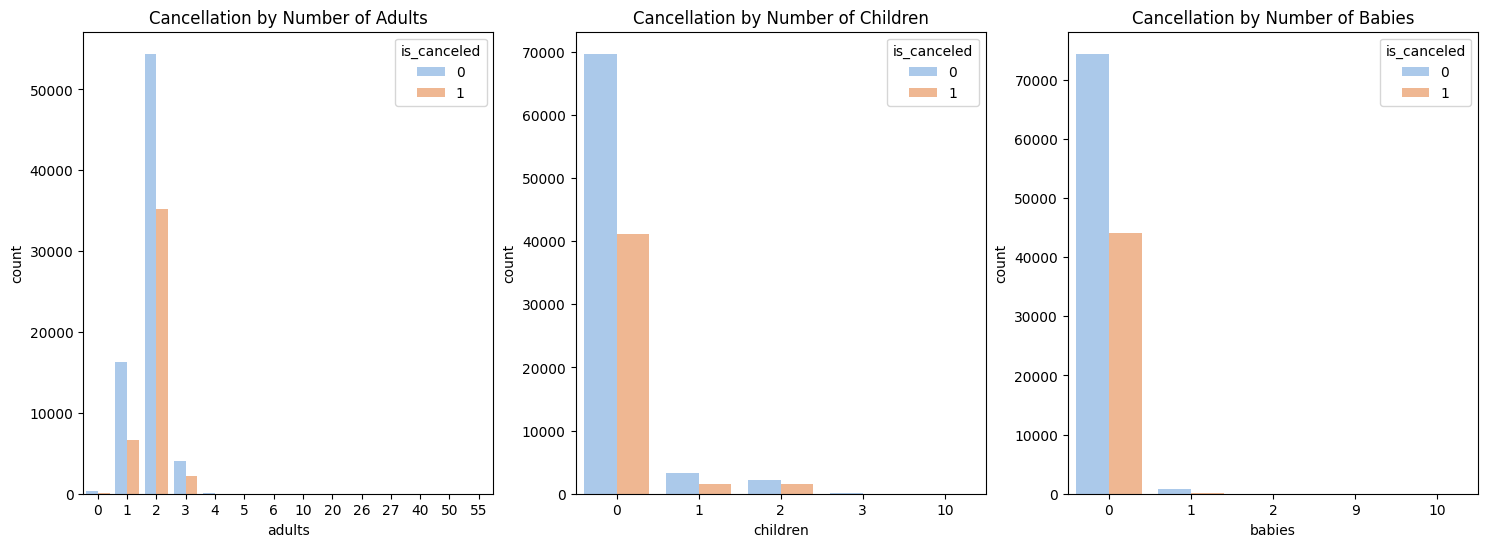

In [122]:
# Plot cancellations based on the number of adults, children, and babies
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=data, x='adults', hue='is_canceled', ax=axes[0], palette='pastel')
axes[0].set_title('Cancellation by Number of Adults')

sns.countplot(data=data, x='children', hue='is_canceled', ax=axes[1], palette='pastel')
axes[1].set_title('Cancellation by Number of Children')

sns.countplot(data=data, x='babies', hue='is_canceled', ax=axes[2], palette='pastel')
axes[2].set_title('Cancellation by Number of Babies')

plt.show()

### Hypothesis Testing:
- Formulate and test at least two hypotheses related to the data. For example:
   - "Customers booking more than 6 months in advance are more likely to cancel."
   - "Weekday bookings have a higher average daily rate than weekend bookings."
- Use appropriate statistical tests to validate these hypotheses.

#### 1: Customers booking more than 6 months in advance are more likely to cancel
- Objective: This hypothesis investigates whether bookings with a long lead time (more than 180 days) have a higher cancellation rate. If true, this insight could help hotels better manage booking inventory and prepare for cancellations in advance.

   -  Null Hypothesis (H0):Customers booking more than 6 months in advance do not have a higher cancellation rate.

   - Alternative Hypothesis (H1):Customers booking more than 6 months in advance have a higher cancellation rate.

- Approach : We'll use a two-proportion z-test to compare the cancellation rates of bookings with a lead time of more than 180 days against those with a shorter lead time.


In [123]:
# Create two groups based on lead time
long_lead_time = data[data['lead_time'] > 180]['is_canceled']
short_lead_time = data[data['lead_time'] <= 180]['is_canceled']

# Calculate the number of cancellations in each group
cancel_long_lead = long_lead_time.sum()
cancel_short_lead = short_lead_time.sum()

# Calculate the total number of bookings in each group
total_long_lead = len(long_lead_time)
total_short_lead = len(short_lead_time)

# Conduct two-proportion z-test
stat, p_value = proportions_ztest([cancel_long_lead, cancel_short_lead],
                                  [total_long_lead, total_short_lead])

# Display the result
print("Z-statistic:", stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Customers booking more than 6 months in advance are more likely to cancel.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cancellation rate for bookings over 6 months in advance.")

Z-statistic: 72.95760669855193
P-value: 0.0
Reject the null hypothesis: Customers booking more than 6 months in advance are more likely to cancel.


#### 2: Weekday bookings have a higher average daily rate than weekend bookings
- Objective: This hypothesis examines if there is a pricing difference between weekday and weekend bookings, which could provide insights into customer behavior and demand patterns, aiding revenue management and pricing strategies.

   - Null Hypothesis (H0):The average daily rate (ADR) for weekday bookings is equal to the ADR for weekend bookings.

   - Alternative Hypothesis (H1):The average daily rate for weekday bookings is higher than that for weekend bookings.

- Approach : We can use a one-tailed t-test to check if there is a statistically significant difference between the average ADR of weekday and weekend bookings.


In [124]:
# Calculate weekday and weekend ADRs
weekday_adr = data[data['stays_in_week_nights'] > data['stays_in_weekend_nights']]['adr']
weekend_adr = data[data['stays_in_weekend_nights'] > data['stays_in_week_nights']]['adr']

# Conduct t-test
stat, p_value = ttest_ind(weekday_adr, weekend_adr, alternative='greater')

# Display the result
print("T-statistic:", stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Weekday bookings have a higher average daily rate than weekend bookings.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ADR between weekday and weekend bookings.")

T-statistic: 6.963231425110075
P-value: 1.6725248399576105e-12
Reject the null hypothesis: Weekday bookings have a higher average daily rate than weekend bookings.


#### 3: Larger groups (3 or more people) tend to stay longer than smaller groups
- Objective: This hypothesis examines whether larger groups, such as families or groups of friends, are likely to book longer stays. Understanding this behavior can help hotels plan room allocations and special amenities for longer stays, enhancing guest satisfaction.

   - Null Hypothesis (H0):Larger groups do not stay longer than smaller groups.

   - Alternative Hypothesis (H1):Larger groups stay longer than smaller groups.

- Approach : We can use a two-sample t-test to compare the average length of stay between smaller groups (fewer than 3 people) and larger groups (3 or more people).


In [125]:
# Define smaller and larger groups based on total number of guests (adults + children + babies)
small_groups = data[data['total_guests'] < 3]['stays_in_week_nights'] + \
               data[data['total_guests'] < 3]['stays_in_weekend_nights']

large_groups = data[data['total_guests'] >= 3]['stays_in_week_nights'] + \
               data[data['total_guests'] >= 3]['stays_in_weekend_nights']

# Conduct t-test
stat, p_value = ttest_ind(large_groups, small_groups, alternative='greater')

# Display results
print("T-statistic:", stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Larger groups tend to stay longer.")
else:
    print("Fail to reject the null hypothesis: No significant difference in stay length between larger and smaller groups.")

T-statistic: 21.47118626614324
P-value: 2.2609359889764083e-102
Reject the null hypothesis: Larger groups tend to stay longer.


#### 4. Cancellation Patterns by Customer Segment
- Hypothesis: "Business travelers have lower cancellation rates than leisure travelers."

- Method: Chi-Squared Test
We will use a Chi-Squared test to evaluate cancellation rates across different customer types.

In [126]:
# Create a contingency table for customer type and cancellation status
contingency_table = pd.crosstab(data['customer_type'], data['is_canceled'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: Business travelers have significantly different cancellation rates than leisure travelers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cancellation rates.")

Chi2: 2222.50416048372, p-value: 0.0
Reject the null hypothesis: Business travelers have significantly different cancellation rates than leisure travelers.


4. Average Daily Rate (ADR) Across Customer Types
- Hypothesis: "Different customer types have significantly different average daily rates."

- Method: ANOVA
We will use ANOVA to compare ADR across different customer types.


In [127]:
# Calculate average ADR for each customer type
adr_by_type = [group['adr'] for name, group in data.groupby('customer_type')]

# Perform ANOVA
f_statistic, p_value = f_oneway(*adr_by_type)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in ADR among customer types.")
else:
    print("Fail to reject the null hypothesis: No significant differences in ADR.")

F-statistic: 1302.3560267126954, p-value: 0.0
Reject the null hypothesis: There are significant differences in ADR among customer types.


### Model Building with validation

In [128]:
##featrue engginearing of the datatast
from sklearn.preprocessing import LabelEncoder

# select the categorical feature 
categorical_feat = dataset.select_dtypes(include=['object']).columns  

In [129]:
for i in categorical_feat:
    print(list(dataset[i].value_counts().index))

['City Hotel', 'Resort Hotel']
['August', 'July', 'May', 'October', 'April', 'June', 'September', 'March', 'February', 'November', 'December', 'January']
['BB', 'HB', 'SC', 'Undefined', 'FB']
['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD', 'USA', 'CHE', 'CN', 'AUT', 'SWE', 'CHN', 'POL', 'ISR', 'RUS', 'NOR', 'ROU', 'FIN', 'DNK', 'AUS', 'AGO', 'LUX', 'MAR', 'TUR', 'HUN', 'ARG', 'JPN', 'CZE', 'IND', 'KOR', 'GRC', 'DZA', 'SRB', 'HRV', 'MEX', 'IRN', 'EST', 'LTU', 'ZAF', 'BGR', 'NZL', 'COL', 'UKR', 'MOZ', 'CHL', 'SVK', 'THA', 'SVN', 'ISL', 'LVA', 'CYP', 'TWN', 'ARE', 'SAU', 'PHL', 'SGP', 'TUN', 'IDN', 'NGA', 'URY', 'EGY', 'LBN', 'HKG', 'PER', 'MYS', 'ECU', 'VEN', 'BLR', 'CPV', 'GEO', 'JOR', 'CRI', 'KAZ', 'MLT', 'OMN', 'GIB', 'AZE', 'MAC', 'KWT', 'QAT', 'DOM', 'IRQ', 'PAK', 'BIH', 'ALB', 'MDV', 'BGD', 'PRI', 'SEN', 'BOL', 'CMR', 'MKD', 'PAN', 'TJK', 'GNB', 'ARM', 'JEY', 'VNM', 'LBY', 'CUB', 'AND', 'LKA', 'MUS', 'CIV', 'JAM', 'KEN', 'SUR', 'BHR', 'TZA', 'MNE', 'FRO', 'CA

In [130]:
## use label encoder to labeling categorical columns
for feat in categorical_feat:
    lebel = LabelEncoder()
    dataset[feat] = lebel.fit_transform(dataset[feat])

In [131]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,3,0,14.0,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,5,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,4,0,14.0,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,5,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,14.0,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,5,27,1,0,1,1,0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,5,27,1,0,2,2,0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,2015-07-03


In [132]:
dataset.drop(columns='reservation_status_date', inplace=True)  ## drop that columns for analysis

<Axes: xlabel='is_canceled', ylabel='count'>

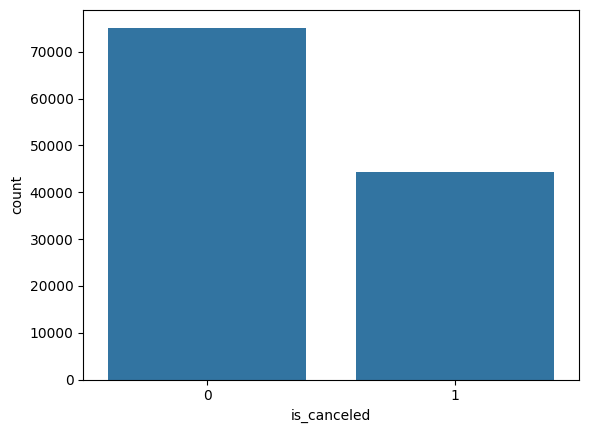

In [133]:
sns.countplot(data=dataset, x='is_canceled')

In [134]:
import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,confusion_matrix,classification_report
#from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [135]:
def balance(x,y):
    """
    input x and y and output will be x_under and y_under they both are the balenced datasets
    """
    undersample = RandomUnderSampler(sampling_strategy='majority')
    # fit and apply the transform
    X_under, y_under = undersample.fit_resample(x, y)
    return X_under, y_under

In [136]:
svr_rbf = SVC(kernel='linear',probability=True)
dt = DecisionTreeClassifier(criterion= 'entropy')
xgb_model = XGBRFClassifier(base_score=0.5,objective="reg:logistic", random_state=0, n_jobs=16)
extratree=ExtraTreesClassifier( n_jobs=16)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy', n_jobs=16)
knn=KNeighborsClassifier(n_neighbors=7, p=1)
lgbm=LGBMClassifier(n_jobs=16)
gau = GaussianNB()
logmodel = LogisticRegression()

In [137]:
def models_all(data):
    x=data.drop(columns='is_canceled')
    y=data.loc[:,['is_canceled']]
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    # fit and apply the transform
    X_under, y_under = undersample.fit_resample(x, y)
    print(f'shape:{X_under.shape,y_under.shape}')
    
    X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42,stratify=y_under)
    
    for clf in (dt,xgb_model,extratree,rf,lgbm,gau,logmodel):
        clf.fit(np.asarray(X_train),np.asarray(y_train))
        y_pred=clf.predict(np.asarray(X_test))
        y_pred_t=clf.predict(np.asarray(X_train))
        print(clf)
        print(f'acc_score: {accuracy_score(y_test,y_pred)}')
        print(f'acc_score_train: {accuracy_score(y_train,y_pred_t)}')
        print(f'confusion_matrix : {confusion_matrix(y_test,y_pred)}')
        print('----------------------------------------------------')
        print(f'-----------------------AUC_ROC_curve-Training--------------------')
        from sklearn.metrics import roc_curve, auc
        import matplotlib.pyplot as plt
        
        x_test_prob=clf.predict_proba(np.asarray(X_test))
        
        fpr, tpr, _ = roc_curve(y_test, x_test_prob[:,1], pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{clf} (AUC = {roc_auc:.2f})')
 
        # Plot random guess line
        plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

        # Set labels and title
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves for Two Models')
        plt.legend()
        plt.show()
        
        print('----------------------------------------------------')

In [156]:
def cross_val_fix1(model, data, n_fold, z):
    
    x1=data.drop(columns='is_canceled')
    y1=data.loc[:,['is_canceled']]
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    # fit and apply the transform
    X_under, y_under = undersample.fit_resample(x1, y1)
    
    X=np.asarray(X_under)
    y=np.asarray(y_under)
    avg=0
    counter=1
    cv=StratifiedKFold(n_splits=n_fold,random_state=z,shuffle=True)
    #cv=KFold(n_splits=n_fold,random_state=z,shuffle=True)
    p=model(n_jobs=16)
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        p.fit(X_train, y_train)
        pred=p.predict(X_test)
        
        acc_test=accuracy_score(y_test,pred)
        avg=avg+acc_test
        
        print("acc for fold", counter, "is ", acc_test)
        
        rep=classification_report(y_test,pred)
        
        
        print("report for fold", counter, "is ", rep)
        #print(p.score(X_train,y_train))
        counter=counter+1
        print('------------------------------------------------------')
        
    print("Average acc ", avg/n_fold)

In [139]:
## drop the reservation_status column becouse it cause the data leakage problem
dataset.drop(columns='reservation_status',inplace=True)

shape:((88448, 28), (88448, 1))
DecisionTreeClassifier(criterion='entropy')
acc_score: 0.8490672696438666
acc_score_train: 0.9963113711523786
confusion_matrix : [[7490 1355]
 [1315 7530]]
----------------------------------------------------
-----------------------AUC_ROC_curve-Training--------------------


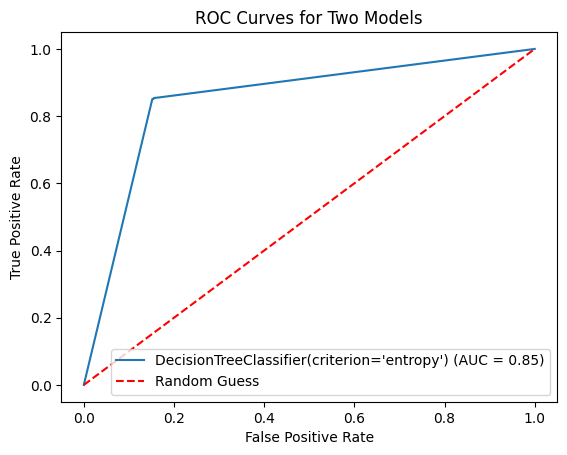

----------------------------------------------------
XGBRFClassifier(base_score=0.5, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=16,
                num_parallel_tree=None, objective='reg:logistic',
                random_state=0, reg_alpha=None, ...)
acc_score: 0.7945732052006783
acc_score_train: 0.8003476638683965
confusion_matrix : [[7044 1801]
 [1833 7012]]
----------------------------------------------

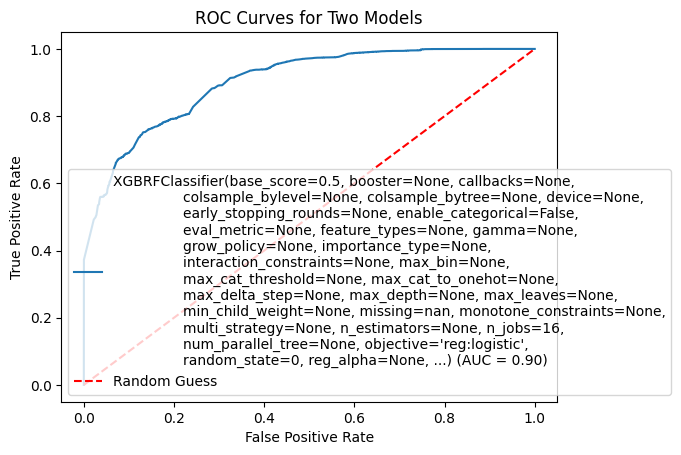

----------------------------------------------------
ExtraTreesClassifier(n_jobs=16)
acc_score: 0.8797625777275296
acc_score_train: 0.9963113711523786
confusion_matrix : [[7910  935]
 [1192 7653]]
----------------------------------------------------
-----------------------AUC_ROC_curve-Training--------------------


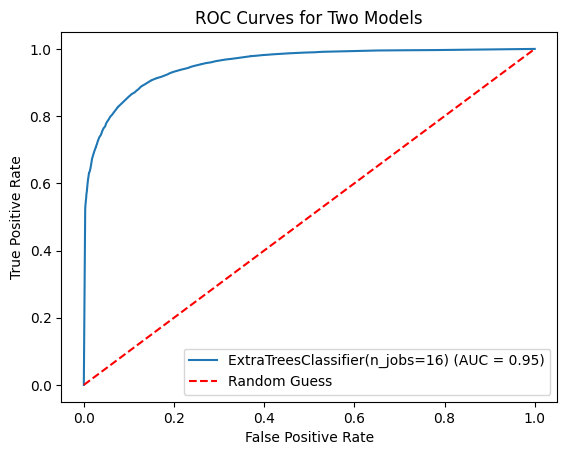

----------------------------------------------------
RandomForestClassifier(criterion='entropy', n_jobs=16)
acc_score: 0.8853589598643301
acc_score_train: 0.9962972384748014
confusion_matrix : [[7914  931]
 [1097 7748]]
----------------------------------------------------
-----------------------AUC_ROC_curve-Training--------------------


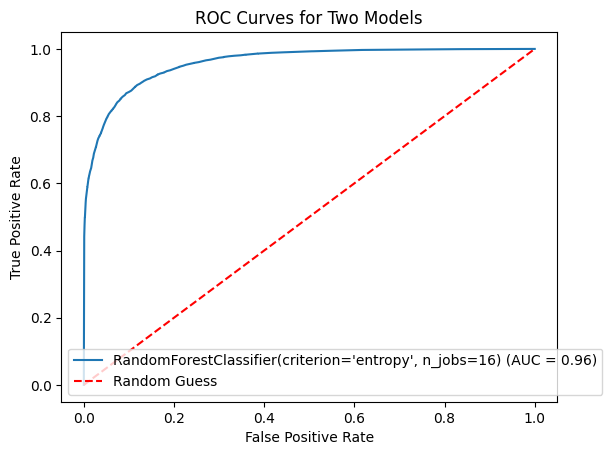

----------------------------------------------------
[LightGBM] [Info] Number of positive: 35379, number of negative: 35379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 70758, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBMClassifier(n_jobs=16)
acc_score: 0.869248162803844
acc_score_train: 0.8774131546962888
confusion_matrix : [[7683 1162]
 [1151 7694]]
----------------------------------------------------
-----------------------AUC_ROC_curve-Training--------------------


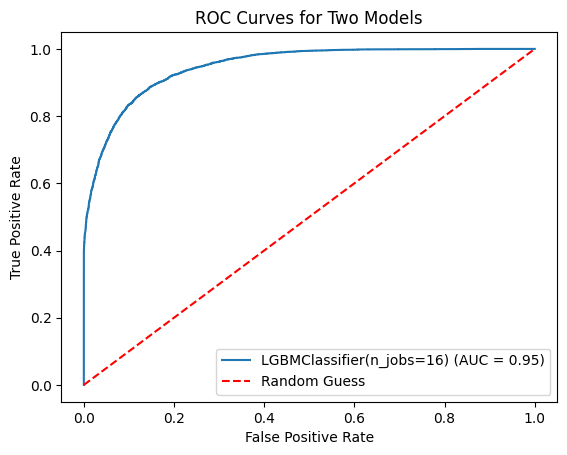

----------------------------------------------------
GaussianNB()
acc_score: 0.6254946297343131
acc_score_train: 0.6260634839876763
confusion_matrix : [[2957 5888]
 [ 737 8108]]
----------------------------------------------------
-----------------------AUC_ROC_curve-Training--------------------


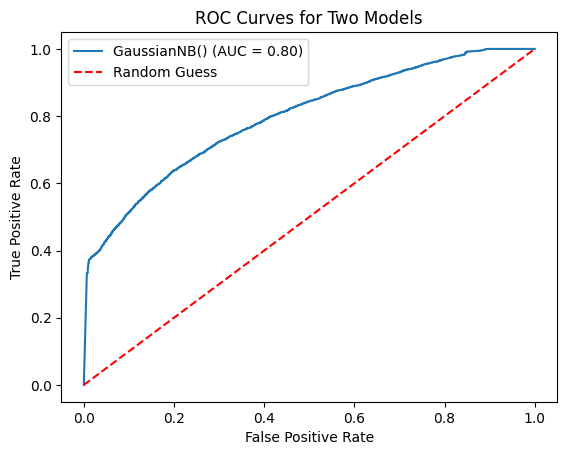

----------------------------------------------------
LogisticRegression()
acc_score: 0.7019219898247597
acc_score_train: 0.7094604143701065
confusion_matrix : [[6271 2574]
 [2699 6146]]
----------------------------------------------------
-----------------------AUC_ROC_curve-Training--------------------


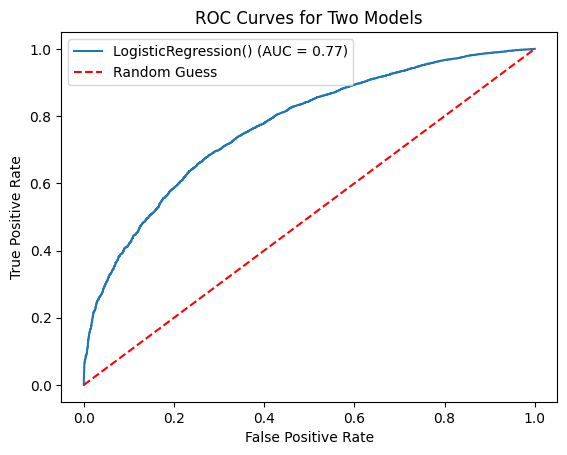

----------------------------------------------------


In [140]:
## find the all models
models_all(dataset)

In [160]:
### LGBMClassifier give the balence result so check the performance of 5-fold cross validation
cross_val_fix1(LGBMClassifier,dataset, 5, 42)

[LightGBM] [Info] Number of positive: 35379, number of negative: 35379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 70758, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
acc for fold 1 is  0.8714527981910684
report for fold 1 is                precision    recall  f1-score   support

           0       0.88      0.87      0.87      8845
           1       0.87      0.88      0.87      8845

    accuracy                           0.87     17690
   macro avg       0.87      0.87      0.87     17690
weighted avg       0.87      0.87      0.87     17690

------------------------------------------------------
[LightGBM] [Info] Number of positive: 35379, number of 

In [161]:
x=dataset.drop(columns='is_canceled')
y=dataset.loc[:,['is_canceled']]

undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42,stratify=y_under)


Index(['lead_time', 'country', 'deposit_type', 'agent', 'adr'], dtype='object')

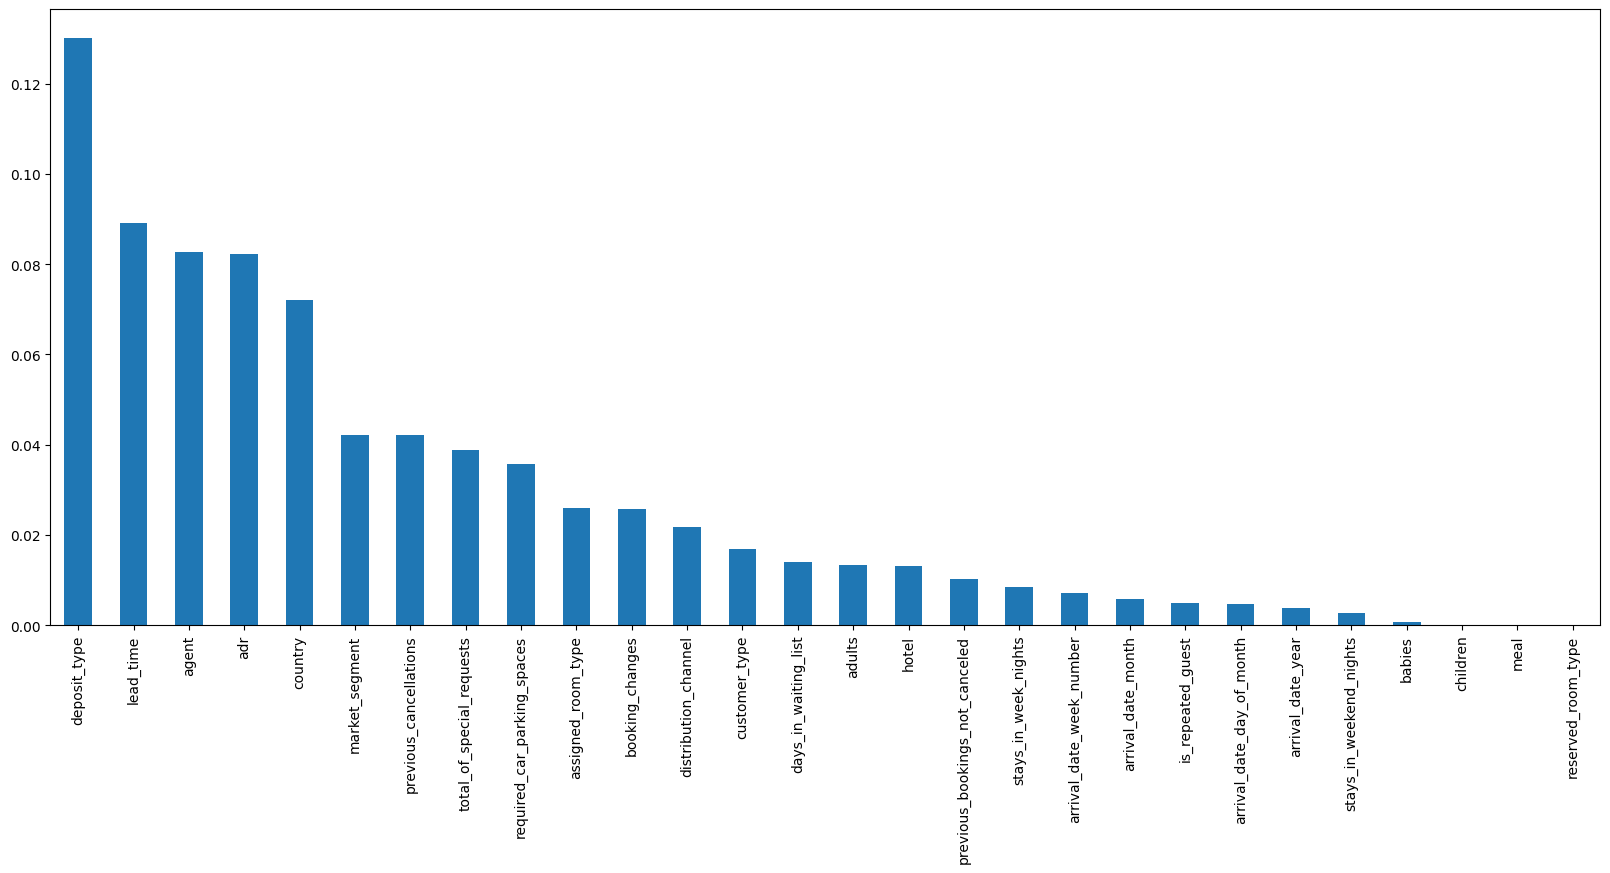

In [162]:
#------------------
#Using DecisionTree
#------------------
#########Mutual information gain - Classification###########

from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
#yacha vapar aapn responce variable descrete nature che asel trch karto karn he 
#information gain descsion tree sarkhach aahe je ki aapla responce variable la predict karnyasatho konte variable kiti imp aahet he sangt. varch aapn correlation responce contineous asel tr vapru shakto
mutual_info = mutual_info_classif(x_train, y_train) 
##convert the series
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
#yane aapn information gain jast aslya nusar desending order ne data arrenge kela
mutual_info.sort_values(ascending=False) 

#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))   

# yacha vapar karun aapla varcha information madhle top jevde haved tevde variable extract karu shakt
from sklearn.feature_selection import SelectKBest  
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]  #top five imp feature distil

[0.0119789  0.10546671 0.03314652 0.02767412 0.03884729 0.03992005
 0.0281286  0.03600224 0.01718135 0.00843196 0.001317   0.01679987
 0.10923386 0.06094228 0.0160643  0.00414289 0.01883428 0.00240411
 0.01591579 0.02245484 0.01914906 0.16055466 0.04087586 0.0025734
 0.02850856 0.04564028 0.03157538 0.05623583]


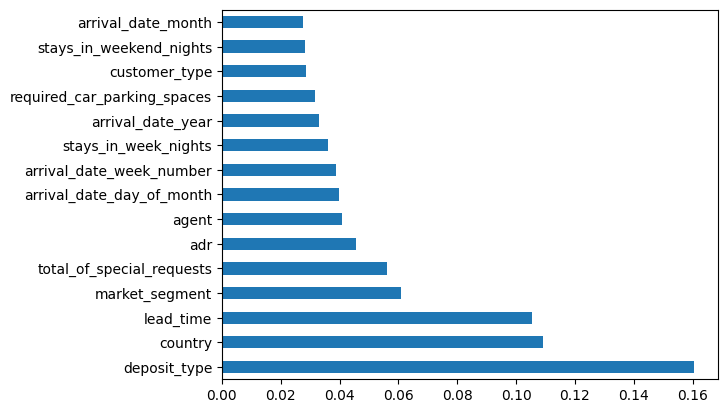

In [165]:
#--------------------------
#Using ExtraTreesClassifier
#--------------------------
#this is also used to check feature importance in classification as will as regression problem###
from sklearn.ensemble import ExtraTreesClassifier #classification problem

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X_under,y_under)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()    #shows top 5 important features

In [145]:
## selcting the etr for prdiction

In [178]:
imp_feat = feat_importances.nlargest(20).index
data_imp = dataset[imp_feat]

In [179]:
x11=data_imp
y11=dataset.loc[:,['is_canceled']]

undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under11, y_under11 = undersample.fit_resample(x11, y11)

x_train11, x_test11, y_train11, y_test11 = train_test_split(X_under11, y_under11, test_size=0.2, random_state=42,stratify=y_under)

In [180]:
from lightgbm import LGBMClassifier
model1=LGBMClassifier()
model1.fit(x_train11,y_train11)


[LightGBM] [Info] Number of positive: 35379, number of negative: 35379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 70758, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [181]:
y_pred=model1.predict(np.asarray(x_test11))
y_pred_t=model1.predict(np.asarray(x_train11))
print(model1)
print(f'acc_score: {accuracy_score(y_test11,y_pred)}')
print(f'acc_score_train: {accuracy_score(y_train11,y_pred_t)}')
print(f'confusion_matrix : {confusion_matrix(y_test11,y_pred)}')

LGBMClassifier()
acc_score: 0.8635387224420576
acc_score_train: 0.8732440148110461
confusion_matrix : [[7616 1229]
 [1185 7660]]


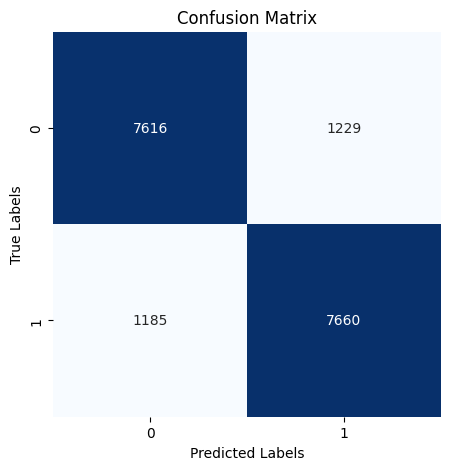

In [184]:
cm=confusion_matrix(y_test11,y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

###  Actionable Insights & Recommendations